This notebook I am going to discuss about,

1. deep learning 
2. forward propagation 
3. gradient decent 
4. backword propagation 
5. basic deep learning model with keras

### Deep Learning :
---- 

Deep learning is a machine learning algorithm where artificial neural network solve particular problem. This neural network is build with *perceptron*, it is a human brain like model. The idea behind deep learning is **trial and error**.    

### Foward Propagation :
----

The basic idea of forward propagation is there will be some input nodes with weights then we will calculate the hidden nodes value and also the output node. 

Here is an example : 
lets say we have two node (2,3) their weight is (1,1) and (-1,1) and hidden node weight is (2,-1), we will calculate hidden node by 

$(2*1)+(3*1) = 5$ 

$(2*-1)+(3*1) = 1$ 

$(5*2)+(1*-1) = 9$ // output 

* forward propagation follow multiply and add process 
* dot product 
* forward propation one data point at a time 
* output is the predicton for the data point  

!['forward_pro'](resources/forward_pro.png)

In [3]:
import numpy as np

input_data = np.array([2,3])

#store the weights of the nodes as dictionary 

weights = {
    'node_0': np.array([1,1]),
    'node_1': np.array([-1,1]),
    'output': np.array([2,-1])
}

node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

hidden_layer_value = np.array([node_0_value, node_1_value])
output = (hidden_layer_value * weights['output']).sum()

print(hidden_layer_value)
print(output)

[5 1]
9


### Backward Propagation : 
----

Most of the time the output of the forward propagation is not closer to the real value, to minimize the error backward propagation comes. Backward propagation updates the weights with respect to the error. 

* start at random weights.
* use forward propagation to make a prediction. 
* use backward propagation to calculate the slope of the loss function w.r.t to each weight.
* multiply that slope by the learning rate and subtract from the current weights. 
* keep going with that cycle untill get to a flat part.  


> In gradient descent one is trying to reach the minimum of the loss function with respect to the parameters using the derivatives calculated in the back-propagation. The easiest way would be to adjust the parameters by substracting its corresponding derivative multiplied by a learning rate. 


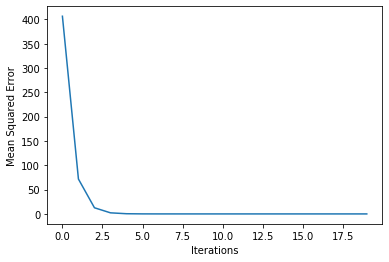

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

#return slop of loss function 
def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error 
    return slope

#return mean square error 
def get_mse(input_data, target, weights):
    error = get_error(input_data, target, weights)
    mse = np.mean(error **2)
    return mse

#return slope 
def get_error(input_data, target, weights):
    preds = (input_data * weights).sum()
    error = preds - target
    return error

# The data point you will make a prediction for
input_data = np.array([4,2,3])

#target 
target_actual = 0

# Sample weights
weights = np.array([10,1,2])

learning_rate = 0.01

mse_hist = []

#print(get_slope(input_data, target_actual, weights))

for i in range(20):
    slope = get_slope(input_data, target_actual, weights)
    weights = weights - learning_rate * slope
    #print('iteration {0} weights : {1}'.format(i, weights))
    mse = get_mse(input_data, target_actual, weights)
    mse_hist.append(mse)

plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

### Keras Architecture : 
--- 
Keras is a deep learning library. It works on top of tensorflow. 

Here is the basic keras architecture : 

* specify architecture
* compile 
* fit 
* save model
* reload model 
* predict 
* evaluate 

In [5]:
import keras 
from keras.layers import Dense 
from keras.models import Sequential 
from keras.models import load_model
from keras.callbacks import EarlyStopping
import numpy as np 
import pandas as pd 

#import data 
df = pd.read_csv('hourly_wages.csv')

target_df = df['wage_per_hour']
feature_df = df.drop(columns = ['wage_per_hour'])

#corvert numpy matrix 
predtictor = feature_df.values
target = target_df.values
#get the number of columns 
n_cols = predtictor.shape[1]
#print(len(predtictor))

#specify model 
model = Sequential()

#specify layer 
#1st layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

#2nd layer 
model.add(Dense(32, activation='relu'))

#output layer 
model.add(Dense(1))

#compile 
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#stop when see model not improving 
early_stopping_monitor = EarlyStopping(patience=2)

#fit
model.fit(predtictor, target, validation_split=0.3, epochs=20, callbacks=[early_stopping_monitor])

#save
model.save('hourly_wages.h5')
model.summary()

#reload 
my_model = load_model('hourly_wages.h5')
# predict  

Using TensorFlow backend.

Train on 373 samples, validate on 161 samples
Epoch 1/20
373/373 [==============================] - 2s 4ms/step - loss: 115.4794 - accuracy: 0.0000e+00 - val_loss: 69.8796 - val_accuracy: 0.0000e+00
Epoch 2/20
373/373 [==============================] - 0s 75us/step - loss: 29.0825 - accuracy: 0.0429 - val_loss: 29.6701 - val_accuracy: 0.0248
Epoch 3/20
373/373 [==============================] - 0s 91us/step - loss: 24.6939 - accuracy: 0.0134 - val_loss: 28.2098 - val_accuracy: 0.0311
Epoch 4/20
373/373 [==============================] - 0s 107us/step - loss: 21.6198 - accuracy: 0.0295 - val_loss: 29.1053 - val_accuracy: 0.0186
Epoch 5/20
373/373 [==============================] - 0s 120us/step - loss: 20.8952 - accuracy: 0.0295 - val_loss: 29.2573 - val_accuracy: 0.0124
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50